# DataSet1 - Students Performance - Linear regression

**imports**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import math
import matplotlib.pyplot as plt
import seaborn as sns

**load dataset**

In [ ]:
df1 = pd.read_csv("StudentsPerformance.csv")
#sample_length of null values
length = 100
df = pd.read_csv("StudentsPerformance.csv")
df_original = pd.read_csv("StudentsPerformance.csv")
summary = df_original.describe()
print(df.head())
print(summary)


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.163

**Find the correlation with each column**

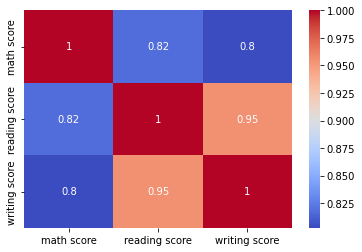

math score       0.817580
reading score    1.000000
writing score    0.954598
Name: reading score, dtype: float64


In [ ]:
# Compute the correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()
# find the correlation of each column with "other_sales"
corr_matrix = df1.corr()["reading score"]

# print the correlation values
print(corr_matrix)

**set random values to nan**

In [ ]:
idx = np.random.choice(df.index, size=length, replace=False)
df.loc[idx, 'reading score'] = np.nan
mask1_df = df["reading score"].isnull()
#print number of nan values in each column
df.isnull().sum()

gender                           0
race/ethnicity                   0
parental level of education      0
lunch                            0
test preparation course          0
math score                       0
reading score                  100
writing score                    0
dtype: int64

**drop null values from dataset to train**

In [ ]:
df_copy1 = df.copy()
df_copy1.dropna(axis=0, inplace=True)

**predicting the null values using linear regression**

In [ ]:
X = df_copy1.iloc[:, [5,7]]
Y = df_copy1.iloc[:, 6]
X_Test = df[mask1_df].iloc[:, [5,7]]
#X_Test = np.nan_to_num(X_Test)
reg = LinearRegression()
reg.fit(X, Y)
res = reg.predict(X_Test)
# Add the predicted values to a new column in the original DataFrame
df_original.loc[mask1_df, 'reading score_predicted'] = res
# Print the DataFrame with both the original and predicted values
print(df_original.loc[mask1_df, ['reading score', 'reading score_predicted']])

     reading score  reading score_predicted
7               43                42.224700
12              81                72.965921
16              89                86.569448
24              71                79.825168
36              81                82.234095
..             ...                      ...
943             62                62.779805
947             58                60.325607
948             50                53.901801
974             63                66.634446
994             63                63.857984

[100 rows x 2 columns]


**fill nan values with predicted values**

In [ ]:
j = 0
arr = df[df['reading score'].isna()].index
for i in arr:
    df.at[i, 'reading score'] = float(res[j])
    j += 1

**calcuate error of linear regression predictions using RMSE**

In [ ]:
y_actual = list(df_original.loc[idx,'reading score'])
y_predicted = list(df.loc[idx,'reading score'])
MSE = np.square(np.subtract(y_actual, y_predicted)).mean()
RMSE = math.sqrt(MSE)
print("Root Mean Square Error using linear regression method:")
print(RMSE)

Root Mean Square Error using linear regression method:
4.1634751671380075


**show graph for comparing the results of linear reg with actual values**

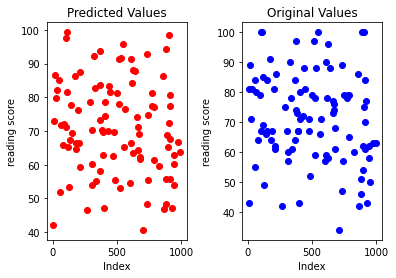

In [ ]:
# Plot predicted values
plt.subplot(1, 2, 1)
plt.scatter(idx, df.loc[idx,'reading score'], color='red')
plt.title('Predicted Values')
plt.xlabel('Index')
plt.ylabel('reading score')

# Plot original values
plt.subplot(1, 2, 2)
plt.scatter(idx, df_original.loc[idx,'reading score'], color='blue')
plt.title('Original Values')
plt.xlabel('Index')
plt.ylabel('reading score')

# Adjust plot spacing
plt.subplots_adjust(wspace=0.4)

# Show plot
plt.show()

**fill null values using mean and compare with actual values using RMSE**

In [ ]:
#calcuate the mean of the column without the dropped values
mean_value = df_copy1['reading score'].mean()
print("The mean of the column withour the dropped values:")
print(mean_value)
y_predicted = [mean_value] * length
MSE = np.square(np.subtract(df.loc[idx, 'reading score'], y_predicted)).mean()
RMSE = math.sqrt(MSE)
print("Root Mean Square Error using mean method:")
print(RMSE)

The mean of the column withour the dropped values:
68.95
Root Mean Square Error using mean method:
14.074740242781472


**show graph for comparing the results of mean method with actual values**

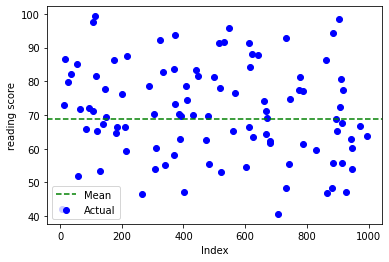

In [ ]:
# Plot mean value in green
plt.axhline(y=mean_value, color='green', linestyle='--', label='Mean')

# Plot actual values in blue
plt.scatter(idx, df.loc[idx, 'reading score'], color='blue', label='Actual')

# Add legend and labels
plt.legend()
plt.xlabel('Index')
plt.ylabel('reading score')

# Show plot
plt.show()

# DataSet2 - video games sales - Linear regression

**imports**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import math
import matplotlib.pyplot as plt
import seaborn as sns

**load dataset**

In [ ]:
df = pd.read_csv("vgsales.csv").head(1000)
df_original = pd.read_csv("vgsales.csv").head(1000)
summary = df_original.describe()

print(summary)

              Rank         Year     NA_Sales     EU_Sales     JP_Sales  \
count  1000.000000   990.000000  1000.000000  1000.000000  1000.000000   
mean    500.847000  2004.862626     2.079090     1.258700     0.550780   
std     289.212225     7.236669     2.616129     1.623482     1.038156   
min       1.000000  1980.000000     0.000000     0.000000     0.000000   
25%     250.750000  2001.000000     0.977500     0.490000     0.000000   
50%     500.500000  2006.000000     1.500000     0.900000     0.075000   
75%     751.250000  2010.000000     2.235000     1.470000     0.665000   
max    1001.000000  2016.000000    41.490000    29.020000    10.220000   

       Other_Sales  Global_Sales  
count  1000.000000   1000.000000  
mean      0.400740      4.289180  
std       0.643864      4.814629  
min       0.000000      1.760000  
25%       0.130000      2.180000  
50%       0.240000      2.890000  
75%       0.440000      4.390000  
max      10.570000     82.740000  


**Find the correlation for each two column**

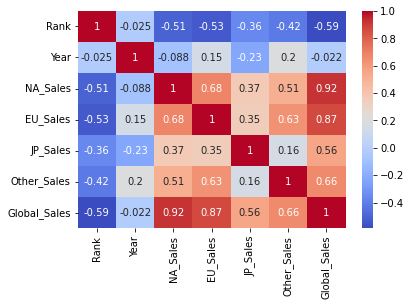

Rank           -0.588136
Year           -0.021763
NA_Sales        0.920483
EU_Sales        0.865994
JP_Sales        0.555188
Other_Sales     0.658975
Global_Sales    1.000000
Name: Global_Sales, dtype: float64


In [ ]:
#sample_length of null values
length = 100
# Compute the correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# find the correlation of each column with "other_sales"
corr_matrix = df.corr()["Global_Sales"]

# print the correlation values
print(corr_matrix)

**set random values to nan**

In [ ]:
idx = np.random.choice(df.index, size=length, replace=False)
df.loc[idx, 'Global_Sales'] = np.nan
mask1_df = df["Global_Sales"].isnull()
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year             10
Genre             0
Publisher         1
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales    100
dtype: int64

**drop null values from dataset to train**

In [ ]:
df_copy1 = df.copy()
df_copy1.dropna(axis=0, inplace=True)
print(df_copy1.isnull().sum())

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


**predicting the null values using linear regression**

In [ ]:
X = df_copy1.iloc[:, [6, 7, 8]]
Y = df_copy1.iloc[:, 10]
X_Test = df[mask1_df].iloc[:, [6, 7, 8]]
# X_Test = np.nan_to_num(X_Test)
reg = LinearRegression()
reg.fit(X, Y)
res = reg.predict(X_Test)
# Add the predicted values to a new column in the original DataFrame
df_original.loc[mask1_df, 'Global_Sales_predicted'] = res
# Print the DataFrame with both the original and predicted values
print(df_original.loc[mask1_df, ['Global_Sales', 'Global_Sales_predicted']])

     Global_Sales  Global_Sales_predicted
11          23.42               23.385492
18          20.61               21.301987
34          14.03               13.030149
35          13.73               13.976164
40          12.73               12.158527
..            ...                     ...
912          1.88                1.852873
932          1.86                1.877679
939          1.85                1.839177
951          1.82                1.864095
976          1.78                1.739149

[100 rows x 2 columns]


**fill nan values with predicted values**

In [ ]:
j = 0
arr = df[df['Global_Sales'].isna()].index
for i in arr:
    df.at[i, 'Global_Sales'] = float(res[j])
    j += 1

**calcuate error of linear regression predictions using RMSE**

In [ ]:
y_actual = list(df_original.loc[idx,'Global_Sales'])
y_predicted = list(df.loc[idx,'Global_Sales'])
MSE = np.square(np.subtract(y_actual, y_predicted)).mean()
RMSE = math.sqrt(MSE)
print("Root Mean Square Error using linear regression method:")
print(RMSE)

Root Mean Square Error using linear regression method:
0.2973710516882103


**show graph for comparing the results of linear reg with actual values**

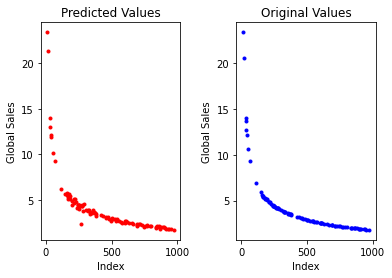

In [ ]:
# Plot predicted values
plt.subplot(1, 2, 1)
plt.scatter(idx, df.loc[idx,'Global_Sales'], color='red', marker = '.')
plt.title('Predicted Values')
plt.xlabel('Index')
plt.ylabel('Global Sales')

# Plot original values
plt.subplot(1, 2, 2)
plt.scatter(idx, df_original.loc[idx,'Global_Sales'], color='blue', marker = '.')
plt.title('Original Values')
plt.xlabel('Index')
plt.ylabel('Global Sales')

# Adjust plot spacing
plt.subplots_adjust(wspace=0.4)

# Show plot
plt.show()

**fill null values using mean and compare with actual values using RMSE**

In [ ]:
#the mean of the all the values in target column except the ones that we dropped
mean_value = df_copy1['Global_Sales'].mean()
y_predicted = [mean_value] * length
MSE = np.square(np.subtract(df.loc[idx, 'Global_Sales'], y_predicted)).mean()
RMSE = math.sqrt(MSE)
print("Root Mean Square Error using mean method:")
print(RMSE)

Root Mean Square Error using mean method:
3.487974695447196


**show graph for comparing the results of mean method with actual values**

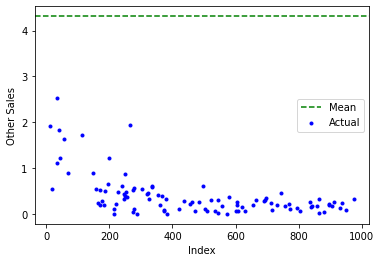

In [ ]:
# Plot mean value in green
plt.axhline(y=mean_value, color='green', linestyle='--', label='Mean')

# Plot actual values in blue
plt.scatter(idx, df.loc[idx, 'Other_Sales'], color='blue', label='Actual', marker = '.')

# Add legend and labels
plt.legend()
plt.xlabel('Index')
plt.ylabel('Other Sales')

# Show plot
plt.show()

# DataSet3 - Big Mart Sale Forecast - Random Forest

**imports**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
import math
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

**load dataset**

In [ ]:
#sample_length of null values
length = 150
df = pd.read_csv("Big Mart Sale Forecast.csv").head(700)
df_original = pd.read_csv("Big Mart Sale Forecast.csv").head(700)
summary = df_original.describe()
print(summary)

       Item_Weight  Item_Visibility    Item_MRP  Outlet_Establishment_Year  \
count   576.000000       700.000000  700.000000                 700.000000   
mean     12.944861         0.066360  140.762090                1997.607143   
std       4.688086         0.052555   63.002964                   8.369418   
min       4.785000         0.000000   31.290000                1985.000000   
25%       8.710000         0.026876   92.635700                1987.000000   
50%      12.850000         0.053690  141.465400                1999.000000   
75%      17.100000         0.094475  188.096400                2004.000000   
max      21.350000         0.297884  265.222600                2009.000000   

       Item_Outlet_Sales  
count         700.000000  
mean         2244.085558  
std          1788.159937  
min            37.950600  
25%           807.615400  
50%          1807.314100  
75%          3188.349750  
max          9267.936000  


**check the distribution of the values in the chosen column**

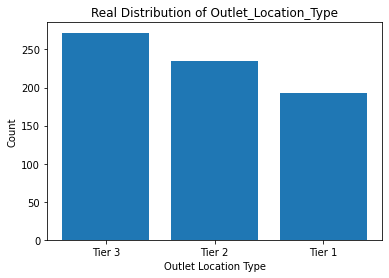

In [ ]:
# Get value counts for Outlet_Location_Type column
location_counts = df['Outlet_Location_Type'].value_counts()

# Plot bar chart of value counts
plt.bar(location_counts.index, location_counts.values)

# Set plot title and axis labels
plt.title('Real Distribution of Outlet_Location_Type')
plt.xlabel('Outlet Location Type')
plt.ylabel('Count')

# Show plot
plt.show()

**set some null values**

In [ ]:
idx = np.random.choice(df.index, size=length, replace=False)
df.loc[idx, 'Outlet_Location_Type'] = np.nan
mask1_df = df["Outlet_Location_Type"].isnull()

**drop null values from dataset to train**

In [ ]:
df_copy1 = df.copy()
df_copy1.dropna(axis=0, inplace=True)
print(df_copy1.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


**predicting the null values using random forest algorithm**

In [ ]:
X = df_copy1.iloc[:, [1,3,5,7,10]]
Y = df_copy1.iloc[:, 8]
X_Test = df[mask1_df].iloc[:, [1,3,5,7,10]]
X_Test = np.nan_to_num(X_Test)
classifier = RandomForestClassifier()
classifier = classifier.fit(X, Y)
res = classifier.predict(X_Test)
# Add the predicted values to a new column in the original DataFrame
df_original.loc[mask1_df, 'Outlet_Location_Type_predicted'] = res
# Print the DataFrame with both the original and predicted values
print(df_original.loc[mask1_df, ['Outlet_Location_Type', 'Outlet_Location_Type_predicted']])

    Outlet_Location_Type Outlet_Location_Type_predicted
5                 Tier 3                         Tier 3
8                 Tier 2                         Tier 2
12                Tier 1                         Tier 1
13                Tier 1                         Tier 1
18                Tier 3                         Tier 3
..                   ...                            ...
665               Tier 3                         Tier 3
676               Tier 3                         Tier 3
690               Tier 3                         Tier 3
691               Tier 2                         Tier 2
698               Tier 1                         Tier 3

[150 rows x 2 columns]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


**fill nan values with predicted values**

In [ ]:
j = 0
arr = df[df['Outlet_Location_Type'].isna()].index
for i in arr:
    df.at[i, 'Outlet_Location_Type'] = res[j]
    j += 1

**Check the distribution after using random forest predictions**

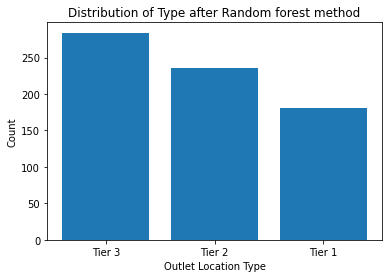

In [ ]:
# Get value counts for Outlet_Location_Type column
location_counts = df['Outlet_Location_Type'].value_counts()

# Plot bar chart of value counts
plt.bar(location_counts.index, location_counts.values)

# Set plot title and axis labels
plt.title('Distribution of Type after Random forest method')
plt.xlabel('Outlet Location Type')
plt.ylabel('Count')

# Show plot
plt.show()

**calcuate error of random forest predictions using traditional method**

In [ ]:
y_actual = list(df_original.loc[idx,'Outlet_Location_Type'])
y_predicted = list(df.loc[idx,'Outlet_Location_Type'])
sum = 0
for i in range(len(y_actual)):
  if y_predicted[i] == y_actual[i]:
    sum += 1
error_rate = 1-(sum / len(y_actual))
print("Error rate using random forest algorithm:")
print(error_rate)

Error rate using random forest algorithm:
0.07999999999999996


**finding the most frequent value**


In [ ]:
counter = 0
num = list(df_original['Outlet_Location_Type'])[0]
  
for i in list(df_original['Outlet_Location_Type']):
    curr_frequency = list(df_original['Outlet_Location_Type']).count(i)
    if(curr_frequency> counter):
        counter = curr_frequency
        num = i
most_freq = num
print("most frequent string in the target column (without the dropped values):")
print(most_freq)

most frequent string in the target column (without the dropped values):
Tier 3


**fill nulls with the most frequent value**

In [ ]:
j = 0
for i in arr:
    df.at[i, 'Outlet_Location_Type'] = most_freq
    j += 1

**calcuate error of most frequent and actual using traditional method**

In [ ]:
y_actual = list(df_original.loc[idx,'Outlet_Location_Type'])
y_predicted = list(df.loc[idx,'Outlet_Location_Type'])
sum = 0
for i in range(len(y_actual)):
  if y_predicted[i] == y_actual[i]:
    sum += 1
error_rate = 1-(sum / len(y_actual))
print("Error rate using most frequent method:")
print(error_rate)

Error rate using most frequent method:
0.6266666666666667


**Check the distribution after using random forest predictions**

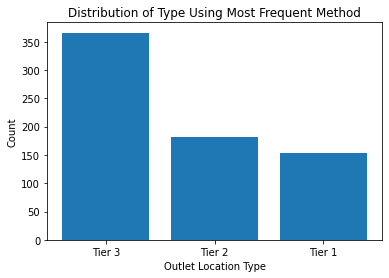

In [ ]:
# Get value counts for Outlet_Location_Type column
location_counts = df['Outlet_Location_Type'].value_counts()

# Plot bar chart of value counts
plt.bar(location_counts.index, location_counts.values)

# Set plot title and axis labels
plt.title('Distribution of Type Using Most Frequent Method')
plt.xlabel('Outlet Location Type')
plt.ylabel('Count')

# Show plot
plt.show()

# DataSet4 - Titanic - Random forest

**imports**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
import math
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

**load dataset**

In [ ]:
#sample_length of null values
length = 100
df = pd.read_csv("titanic.csv")
df_original = pd.read_csv("titanic.csv")
summary = df_original.describe()

print(df.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Embarked  
0   330911   7.8292        Q  
1   363272   7.0000        S  
2   240276   9.6875        Q  
3   315154   8.6625        S  
4  3101298  12.2875        S  


**Check the distribution of the values in the chosen column**

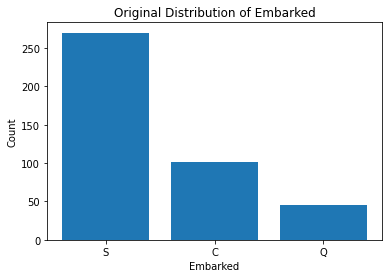

In [ ]:
# Get value counts for Outlet_Location_Type column
location_counts = df['Embarked'].value_counts()

# Plot bar chart of value counts
plt.bar(location_counts.index, location_counts.values)

# Set plot title and axis labels
plt.title('Original Distribution of Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')

# Show plot
plt.show()

**set random values to nan**

In [ ]:
idx = np.random.choice(df.index, size=length, replace=False)
df.loc[idx, 'Embarked'] = np.nan
mask1_df = df["Embarked"].isnull()
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked       100
dtype: int64

**drop null values from dataset to train**

In [ ]:
df_copy1 = df.copy()
df_copy1.dropna(axis=0, inplace=True)
print(df_copy1.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


**predicting the null values using random forest algorithm**

In [ ]:
X = df_copy1.iloc[:, [1,2,5,6,7,9]]
Y = df_copy1.iloc[:, 10]
X_Test = df[mask1_df].iloc[:, [1,2,5,6,7,9]]
X_Test = np.nan_to_num(X_Test)
classifier = RandomForestClassifier()
classifier = classifier.fit(X, Y)
res = classifier.predict(X_Test)
# Add the predicted values to a new column in the original DataFrame
df_original.loc[mask1_df, 'Embarked_predicted'] = res
# Print the DataFrame with both the original and predicted values
print(df_original.loc[mask1_df, ['Embarked', 'Embarked_predicted']])

    Embarked Embarked_predicted
6          Q                  S
9          S                  S
12         S                  S
15         C                  S
16         Q                  S
..       ...                ...
399        Q                  S
401        S                  S
402        C                  C
405        C                  S
406        S                  S

[100 rows x 2 columns]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


**fill nan values with predicted values**

In [ ]:
j = 0
arr = df[df['Embarked'].isna()].index
for i in arr:
    df.at[i, 'Embarked'] = res[j]
    j += 1

**calcuate error of random forest predictions using traditional method**

In [ ]:
y_actual = list(df_original.loc[idx, 'Embarked'])
y_predicted = list(df.loc[idx, 'Embarked'])
sum = 0
for i in range(len(y_actual)):
  if y_predicted[i] == y_actual[i]:
    sum += 1
error_rate = 1-(sum / len(y_actual))
print("Error rate using random forest algorithm:")
print(error_rate)

Error rate using random forest algorithm:
0.28


**Check the distributin after using random forest predictions**

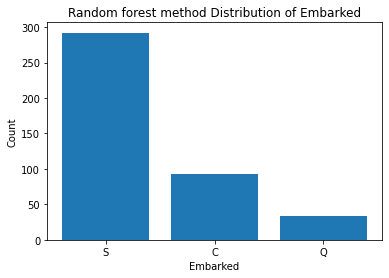

In [ ]:
# Get value counts for Outlet_Location_Type column
location_counts = df['Embarked'].value_counts()

# Plot bar chart of value counts
plt.bar(location_counts.index, location_counts.values)

# Set plot title and axis labels
plt.title('Random forest method Distribution of Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')

# Show plot
plt.show()

**finding the most frequent value**


In [ ]:
counter = 0
num = list(df_original['Embarked'])[0]
  
for i in list(df_original['Embarked']):
    curr_frequency = list(df_original['Embarked']).count(i)
    if(curr_frequency> counter):
        counter = curr_frequency
        num = i
most_freq = num

**fill nulls with the most frequent value**

In [ ]:
j = 0
for i in arr:
    df.at[i, 'Embarked'] = most_freq
    j += 1

**calcuate error of most frequent and actual using traditional method**

In [ ]:
y_actual = list(df_original.loc[idx, 'Embarked'])
y_predicted = list(df.loc[idx,'Embarked'])
sum = 0
for i in range(len(y_actual)):
  if y_predicted[i] == y_actual[i]:
    sum += 1
error_rate = 1-(sum / len(y_actual))
print("Error rate using most frequent method:")
print(error_rate)

Error rate using most frequent method:
0.345


****show the distribution after using most frequent method****

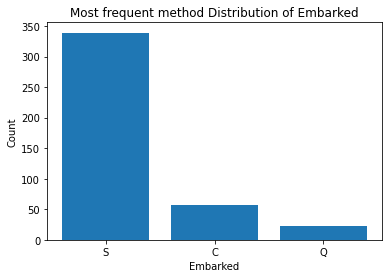

In [ ]:
# Get value counts for Outlet_Location_Type column
location_counts = df['Embarked'].value_counts()

# Plot bar chart of value counts
plt.bar(location_counts.index, location_counts.values)

# Set plot title and axis labels
plt.title('Most frequent method Distribution of Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')

# Show plot
plt.show()